In [1]:
# YKSINKERTAINEN EKSPONENTIAALISEN TASOITUKSEN MALLI

# EI TRENDIÄ EIKÄ KAUSIVAIHTELUA

# Aikasarjaennustaminen - ei trendiä eikä kausivaihtelua
# Yksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa ei ole havaittavaa trendiä tai kausivaihtelua. 
# Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja 
# liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti 
# päivitettävissä uusien havaintojen myötä.
# Jos ennustetaan pidemmälle kuin seuraavaan aikaleimaan, niin yksinkertainen eksoponentiaalinen tasoitus 
# antaa kaikille tuleville aikaleimoille saman ennusteen.
# Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.

# Huomaa, että tässä esimerkissä yksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa 
# on selkeä trendi ja kausivaihtelu, jotka malli jättää huomiotta!

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# Tuodaan data
df=pd.read_excel('Saapuneet puhelut viikkotasolla.xlsx')
df

,Date,Saapuneet
0,2017-12-10,663
1,2017-12-17,941
2,2017-12-24,658
3,2017-12-31,1206
4,2018-01-07,991
...,...,...
161,2021-01-10,2505
162,2021-01-17,3626
163,2021-01-24,2996
164,2021-01-31,3719


In [3]:
# Date indexiin
df.index = pd.to_datetime(df['Date'],format="%Y-%m")
df=df.drop('Date',axis=1)
df

,Saapuneet
Date,
2017-12-10,663
2017-12-17,941
2017-12-24,658
2017-12-31,1206
2018-01-07,991
...,...
2021-01-10,2505
2021-01-17,3626
2021-01-24,2996


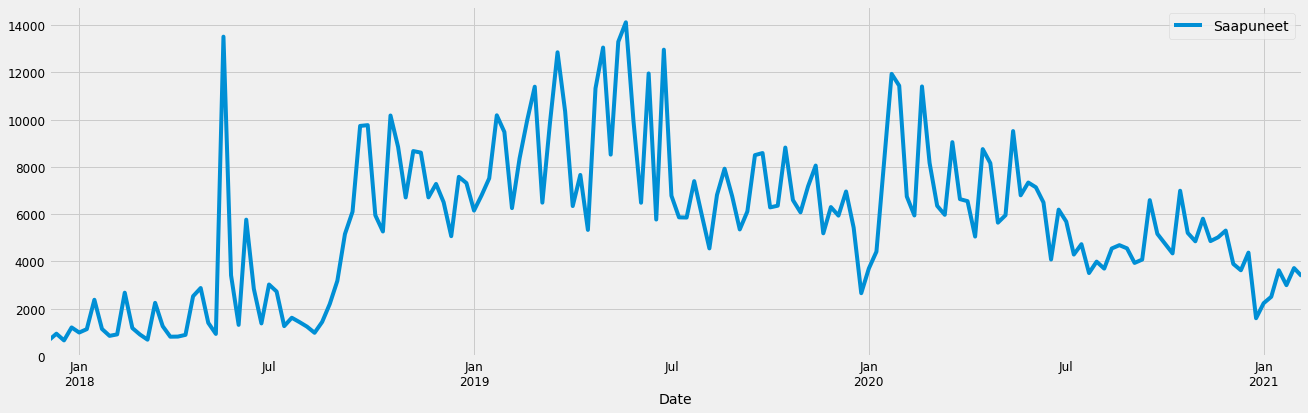

In [4]:
# Visualizing Time Series Data
df.plot(figsize=(20, 6))
plt.show()

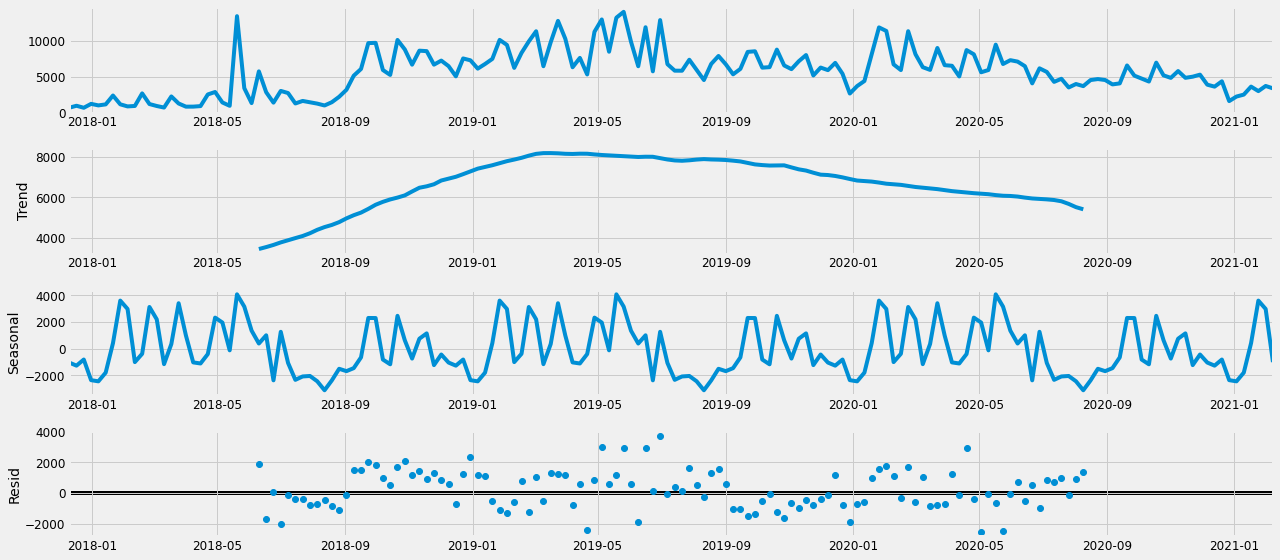

In [5]:
# Visualizing Time Series Data
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [6]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#freq-parametrille käytän arvoa 'W', koska kyseessä on viikoittainen data. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], freq = 'W').fit()

In [7]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Kone-ennuste'] = malli.fittedvalues
df

,Saapuneet,Kone-ennuste
Date,,
2017-12-10,663,688.217105
2017-12-17,941,680.177612
2017-12-24,658,763.330687
2017-12-31,1206,729.750094
2018-01-07,991,881.583854
...,...,...
2021-01-10,2505,3102.374631
2021-01-17,3626,2911.924963
2021-01-24,2996,3139.580017


<AxesSubplot:xlabel='Date'>

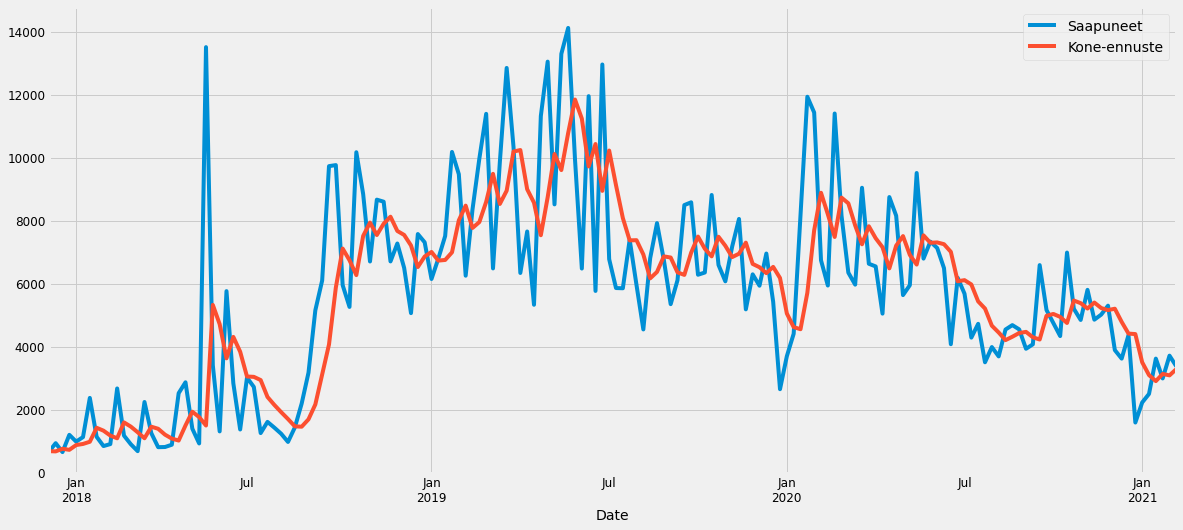

In [8]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Kone-ennuste,Ennustevirhe
Date,,,
2017-12-10,663,688.217105,-25.217105
2017-12-17,941,680.177612,260.822388
2017-12-24,658,763.330687,-105.330687
2017-12-31,1206,729.750094,476.249906
2018-01-07,991,881.583854,109.416146
...,...,...,...
2021-01-10,2505,3102.374631,-597.374631
2021-01-17,3626,2911.924963,714.075037
2021-01-24,2996,3139.580017,-143.580017


Text(0, 0.5, 'Ennustevirhe')

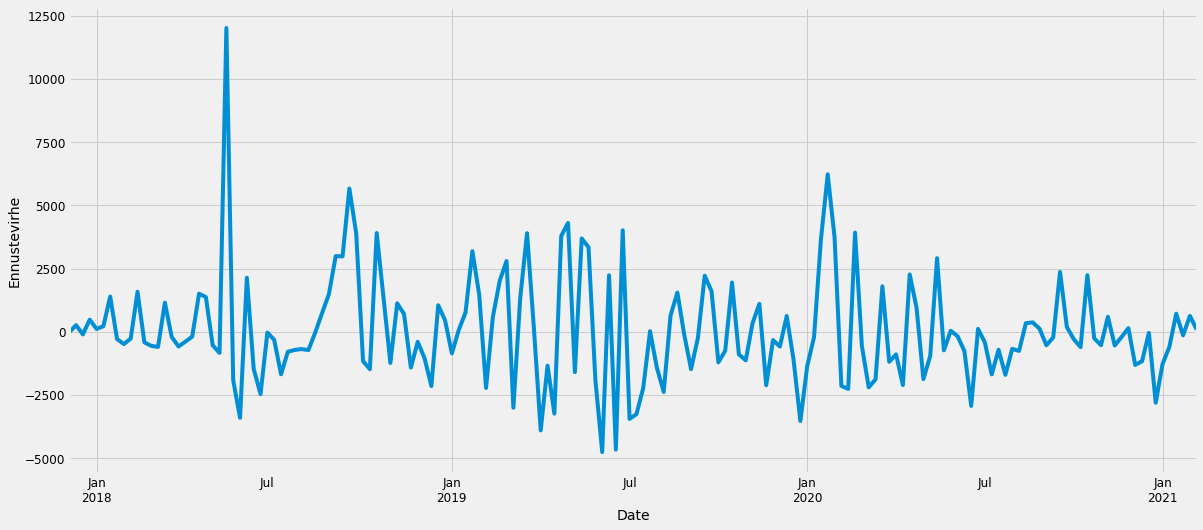

In [10]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

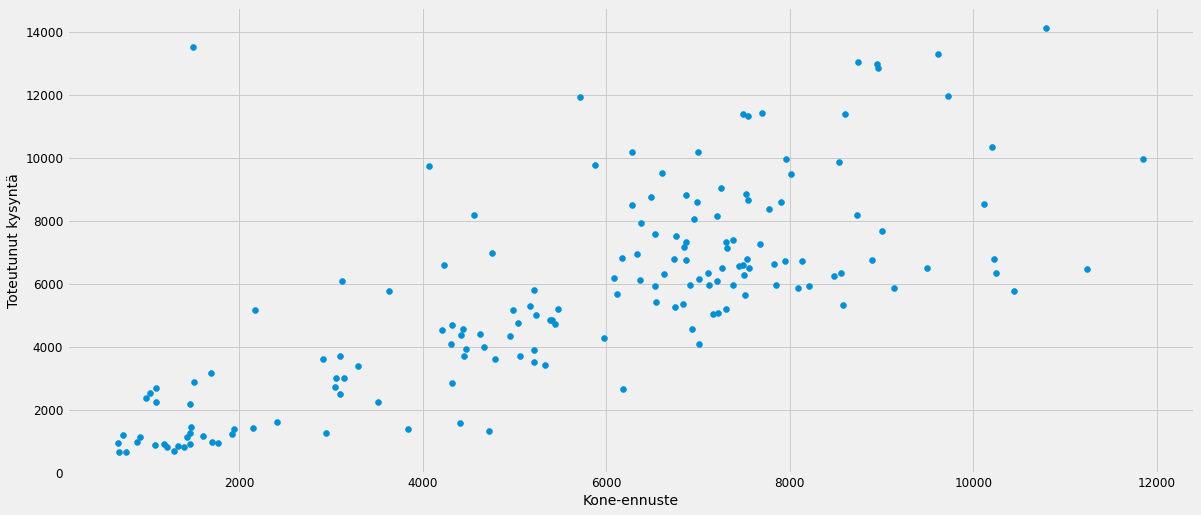

In [11]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Kone-ennuste'], y = df['Saapuneet'])
plt.xlabel('Kone-ennuste')
plt.ylabel('Toteutunut kysyntä')

In [12]:
malli.summary()

Dep. Variable:,Saapuneet,No. Observations:,166
Model:,ExponentialSmoothing,SSE,754955548.707
Optimized:,True,AIC,2548.810
Trend:,None,BIC,2555.034
Seasonal:,None,AICC,2549.059
Seasonal Periods:,None,Date:,"Wed, 10 Feb 2021"
Box-Cox:,False,Time:,15:52:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3188111,alpha,True
initial_level,688.21711,l.0,True


In [13]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Kone-ennuste,Ennustevirhe
Date,,,
2021-01-10,2505,3102.374631,-597.374631
2021-01-17,3626,2911.924963,714.075037
2021-01-24,2996,3139.580017,-143.580017
2021-01-31,3719,3093.805113,625.194887
2021-02-07,3380,3293.124188,86.875812


In [14]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2021-02-14', periods = 6, freq = 'W')

# Ennusteet 6 viikolle
ennusteet = malli.forecast(6)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2021-02-14,3320.821162
2021-02-21,3320.821162
2021-02-28,3320.821162
2021-03-07,3320.821162
2021-03-14,3320.821162
2021-03-21,3320.821162


<AxesSubplot:xlabel='Date'>

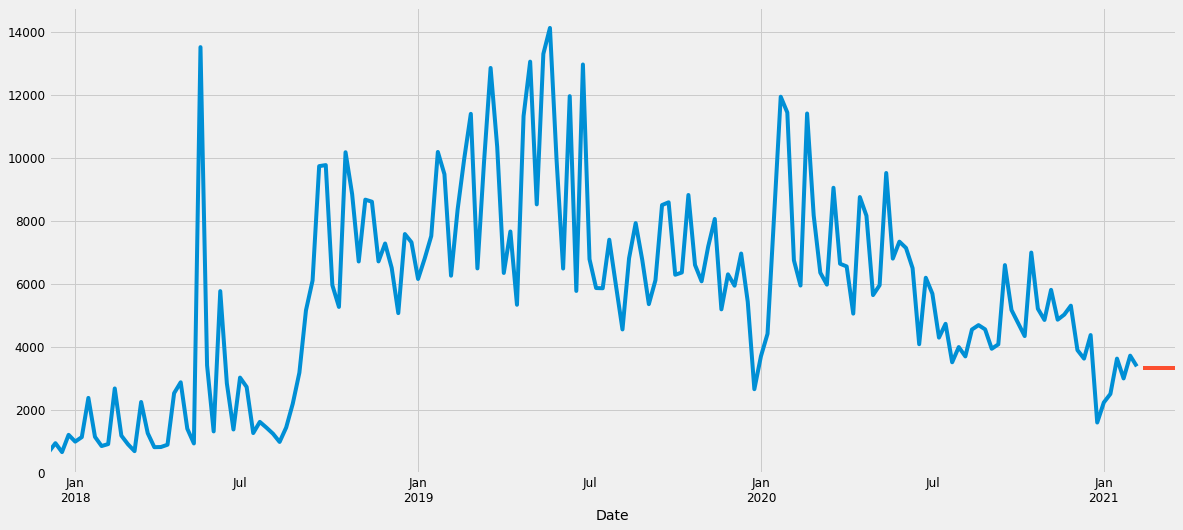

In [15]:
# Viivakaavio havainnoista
#Huomaa, että yksinkertainen eksponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [16]:
df.head()

,Saapuneet,Kone-ennuste,Ennustevirhe
Date,,,
2017-12-10,663,688.217105,-25.217105
2017-12-17,941,680.177612,260.822388
2017-12-24,658,763.330687,-105.330687
2017-12-31,1206,729.750094,476.249906
2018-01-07,991,881.583854,109.416146
